# SVM (Support Vector Machine)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 데이터 준비
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=42)

In [3]:
# 모델 학습 및 평가
from sklearn.svm import SVC

model = SVC(kernel='rbf')
model.fit(X_train, y_train)

model.score(X_test, y_test)

1.0

In [6]:
df = pd.DataFrame(iris_data.data[:, :2], columns=iris_data.feature_names[:2])
df[iris_data.target_names[0]] = iris_data.target

In [7]:
X = iris_data.data[:,:2]
y = iris_data.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)


In [9]:
# 모델 학습 및 평가가
svm_clf = SVC(kernel='linear', C=1.0)

svm_clf.fit(X_train, y_train)

svm_clf.score(X_train, y_train), svm_clf.score(X_test, y_test)

(0.8, 0.8333333333333334)

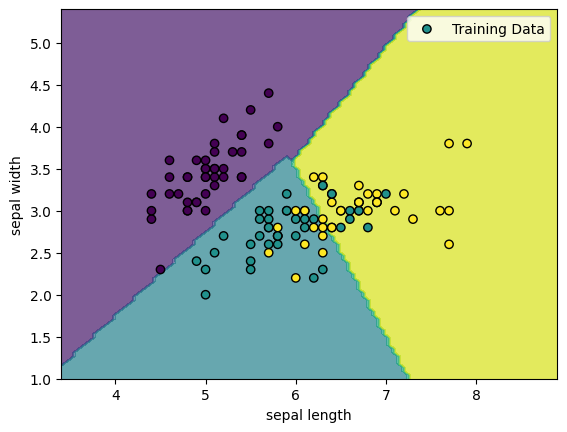

In [ ]:
# 시각화
from sklearn.inspection import DecisionBoundaryDisplay

# 결정 경계
dbd = DecisionBoundaryDisplay.from_estimator(svm_clf, X_train, alpha=0.7)

# 훈련데이터 산점도
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', label='Training Data')

plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.show()

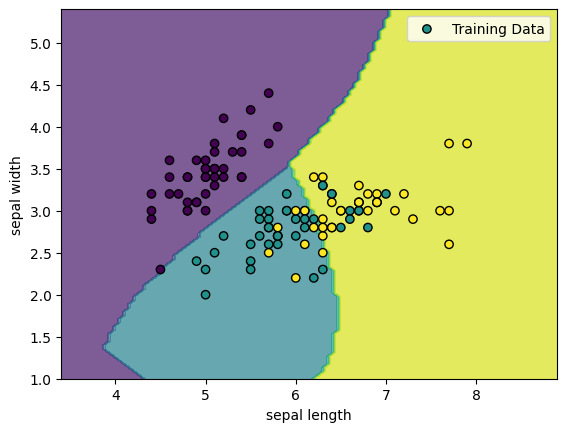

In [17]:

svm_clf = SVC(kernel='rbf', C=1.0, gamma=0.5)
svm_clf.fit(X_train, y_train)
# svm_clf.score(X_train, y_train), svm_clf.score(X_test, y_test)

# 결정 경계
dbd = DecisionBoundaryDisplay.from_estimator(svm_clf, X_train, alpha=0.7)

# 훈련데이터 산점도
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', label='Training Data')

plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.show()

# SVR (Support Vector Regressor)

In [19]:
# 데이터 준비
np.random.seed(0)
X = np.sort(np.random.rand(40, 1) * 5, axis=0)
y = np.sin(X).ravel() + np.random.randn(40) * 0.1

X_test = np.linspace(0,5,100).reshape(-1,1)

In [25]:
# 모델 학습 및 예측
from sklearn.svm import SVR

svr_ = SVR()

# 학습
svr_.fit(X, y)

# 예측 
pred = svr_.predict(X_test)

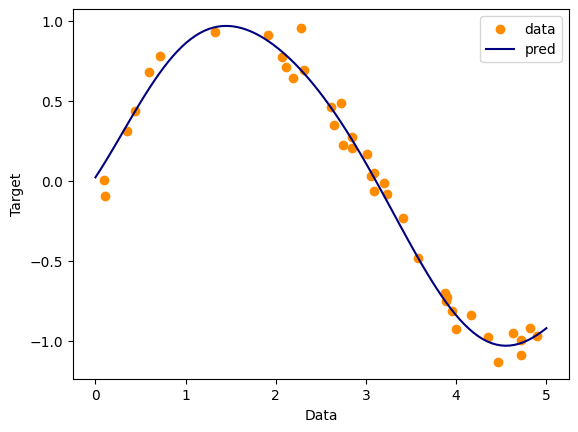

In [26]:
# 결과 시각화
plt.scatter(X, y, color='darkorange', label='data')
plt.plot(X_test, pred, color='navy', label='pred')

plt.xlabel('Data')
plt.ylabel('Target')
plt.legend()
plt.show()

In [29]:
# 모델 학습 및 예측
from sklearn.svm import SVR

svr_rbf = SVR(kernel='rbf')
svr_lin = SVR(kernel='linear')
svr_poly = SVR(kernel='poly')

# 학습
svr_rbf.fit(X, y)
svr_lin.fit(X, y)
svr_poly.fit(X, y)

# 예측 
rbf_pred = svr_rbf.predict(X_test)
lin_pred = svr_lin.predict(X_test)
poly_pred = svr_poly.predict(X_test)

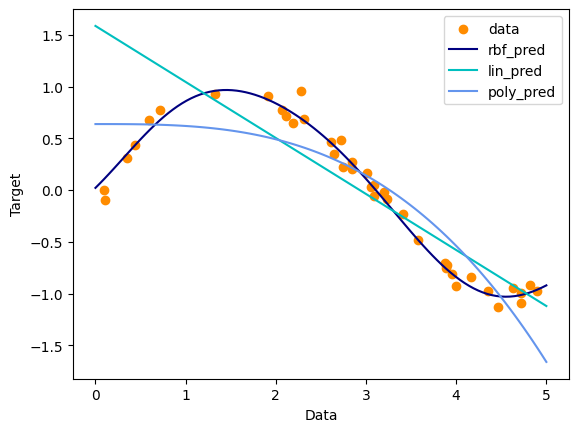

In [30]:
# 결과 시각화
plt.scatter(X, y, color='darkorange', label='data')
plt.plot(X_test, rbf_pred, color='navy', label='rbf_pred')
plt.plot(X_test, lin_pred, color='c', label='lin_pred')
plt.plot(X_test, poly_pred, color='cornflowerblue', label='poly_pred')

plt.xlabel('Data')
plt.ylabel('Target')
plt.legend()
plt.show()

In [40]:
# 데이터 로드
from sklearn.datasets import fetch_california_housing

housing_data = fetch_california_housing()

X = housing_data.data
y = housing_data.target

In [48]:
# 데이터 분리 및 스케일링
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

scaler_x = StandardScaler()
X_train_scaled = scaler_x.fit_transform(X_train)
X_test_scaled = scaler_x.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).ravel()

In [52]:
# 모델 학습 및 예측
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

svr_model = SVR(kernel='rbf', C=10.0, epsilon=0.1)

# 학습
svr_model.fit(X_train_scaled, y_train_scaled)

y_pred_scaled = svr_model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))

mse = mean_squared_error(y_test, y_pred)
mse

0.3192684579356557